Here I want the distribution of skills over the month

In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [2]:
df_exploded = df.explode('job_skills')
# Defining the job name
job = 'Data Analyst'
df_exploded = df_exploded[df_exploded['job_title_short'] == job]

# recuperer les mois et les numeros de mois
df_exploded['job_posted_month'] = df_exploded['job_posted_date'].dt.strftime('%B') #optional
df_exploded['month_number'] = pd.to_datetime(df_exploded['job_posted_month'], format='%B').dt.month

In [3]:
# Creation of a list to access the desired columns more quickly
liste = ['month_number', 'job_skills']
df_exploded = df_exploded[liste]

In [4]:
# Retrieve the top skills 
top_skills = df_exploded['job_skills'].value_counts().head(5).index
top_skills=top_skills.to_list()

In [29]:
df_exploded = df_exploded[df_exploded['job_skills'].isin(top_skills)]
pivot_table = df_exploded.pivot_table(index= 'month_number',
                                     columns='job_skills',
                                     aggfunc='size',
                                     fill_value=0
                                     )

In [34]:
pivot_table.reset_index(inplace=True)
pivot_table['job_posted_month'] = pd.to_datetime(pivot_table['month_number'], format='%m').dt.strftime('%B')
#pivot_table.sort_values(by='month_number', inplace=True)
pivot_table.set_index('job_posted_month',inplace=True)
pivot_table.drop(columns='month_number')

job_skills,excel,power bi,python,sql,tableau
job_posted_month,,,,,
January,8170,4285,6606,11336,5596
February,5772,3307,4751,7947,3936
March,5675,3176,4741,7868,4051
April,5496,3106,4557,7553,3776
May,4773,2695,4070,6617,3245
June,5724,3275,4707,7584,3812
July,5513,3350,4831,7687,3928
August,6482,3859,5576,8823,4533
September,4886,3118,4229,6829,3446


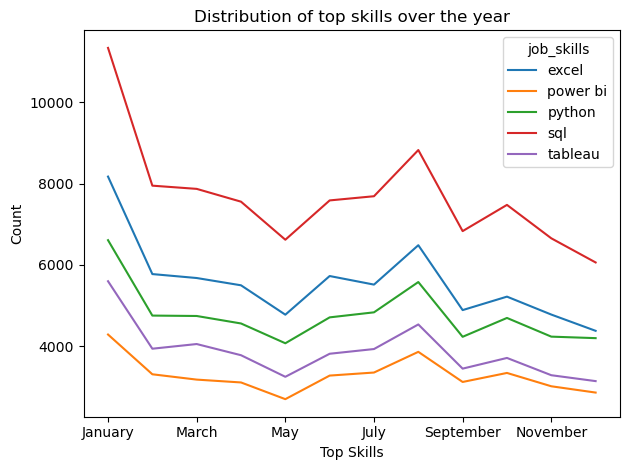

In [35]:
#Plotting
pivot_table.iloc[:,1:6].plot()
plt.title('Distribution of top skills over the year')
plt.xlabel('Top Skills')
plt.ylabel('Count')
plt.tight_layout()
plt.show()